<a href="https://colab.research.google.com/github/rahuss/Rahul-Sinha/blob/main/Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")

In [4]:
seed_value = 123;
np.random.seed(seed_value);
exec(open(os.path.abspath('image_common_utils.py')).read())

In [5]:
def detect_and_show_face_in_image(image_for_face_detection, face_cascade_classifier, eye_cascade_classifier, sz):
    gray = cv2.cvtColor(image_for_face_detection, cv2.COLOR_BGR2GRAY)
    faces = face_cascade_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=6, minSize=(30, 30))
    str_msg_on_image = 'faces:' + str(len(faces))
    eyes_count = 0
    for (x, y, w, h) in faces:
        if h <= 0 or w <= 0:
            pass
        image_for_face_detection = cv2.rectangle(image_for_face_detection, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade_classifier.detectMultiScale(roi_gray)
        roi_color = image_for_face_detection[y:y+h, x:x+w]

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            eyes_count += 1
    str_msg_on_image += ', eyes: ' + str(eyes_count)
    cv2.putText(image_for_face_detection, str_msg_on_image, (sz[0]-200, sz[1]-25), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 1, cv2.LINE_AA)
    return image_for_face_detection

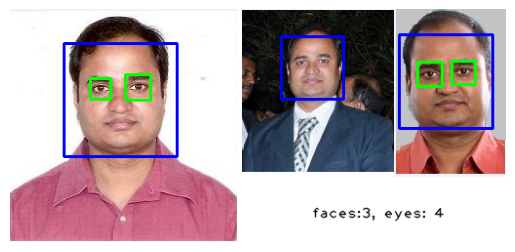

In [6]:
face_cascade_classifier = cv2.CascadeClassifier('./computer_vision/opencv-master/data/haarcascades_cuda/haarcascade_frontalface_default.xml')
eye_cascade_classifier = cv2.CascadeClassifier('./computer_vision/opencv-master/data/haarcascades_cuda/haarcascade_eye_tree_eyeglasses.xml')

if face_cascade_classifier.empty() or eye_cascade_classifier.empty():
    print('Missing face or eye classifier XML file')
else:
    image_for_face_detection = cv2.imread('./computer_vision/image_data/face_3.png')
    sz = (image_for_face_detection.shape[1], image_for_face_detection.shape[0])
    image_for_face_detection = detect_and_show_face_in_image(image_for_face_detection, face_cascade_classifier, eye_cascade_classifier, sz)
    plt.imshow(cv2.cvtColor(image_for_face_detection, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [7]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()

    if not ret:
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)


    cv2.imshow('Webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

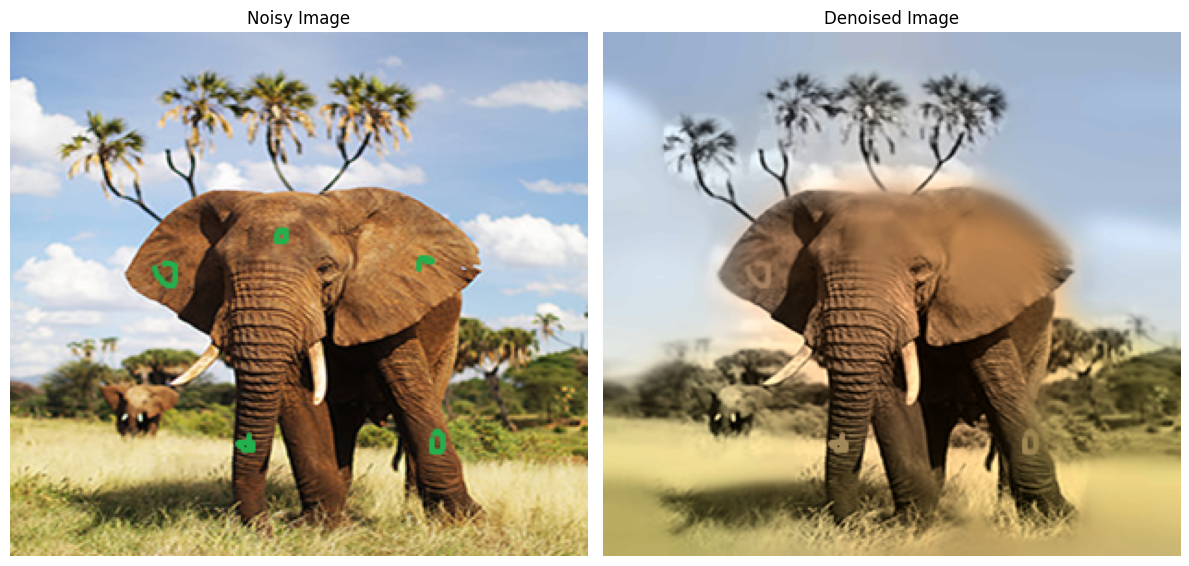

In [8]:
def show_image(images, titles=None, row_plot=1):
    fig, axes = plt.subplots(row_plot, len(images) // row_plot, figsize=(12, 6))
    axes = axes.flatten()
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

image_noisy = cv2.imread('./computer_vision/image_data/elephant_marked.png', cv2.IMREAD_COLOR)
image_noisy_denoised = cv2.fastNlMeansDenoisingColored(image_noisy, None, 10, 10, 7 * 5, 21 * 5)

show_image([cv2.cvtColor(image_noisy, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy_denoised, cv2.COLOR_BGR2RGB)], titles=['Noisy Image', 'Denoised Image'], row_plot=1)

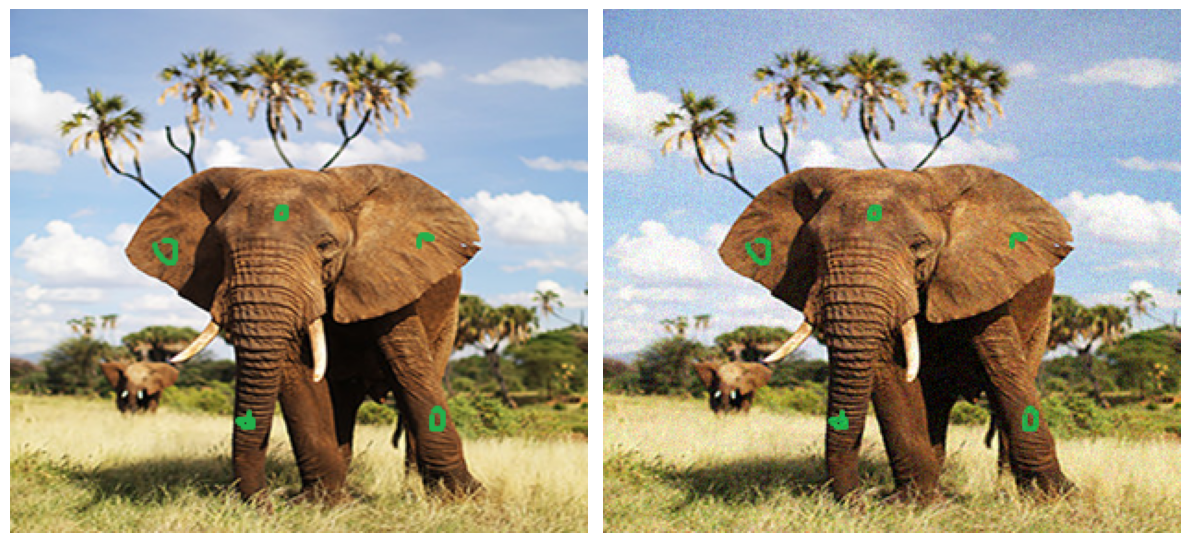

In [9]:
def show_image(images, row_plot=1):
    fig, axes = plt.subplots(row_plot, len(images) // row_plot, figsize=(12, 6))
    axes = axes.flatten()
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

image_noisy = cv2.imread('./computer_vision/image_data/elephant_marked.png', cv2.IMREAD_COLOR)

# Generate Gaussian noise with mean 0 and standard deviation 10
noise = np.random.randn(*image_noisy.shape) * 10

# Add noise to the original noisy image and clip to [0, 255]
image_noisy2 = np.uint8(np.clip(image_noisy + noise, 0, 255))

show_image([cv2.cvtColor(image_noisy, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy2, cv2.COLOR_BGR2RGB)], row_plot=1)


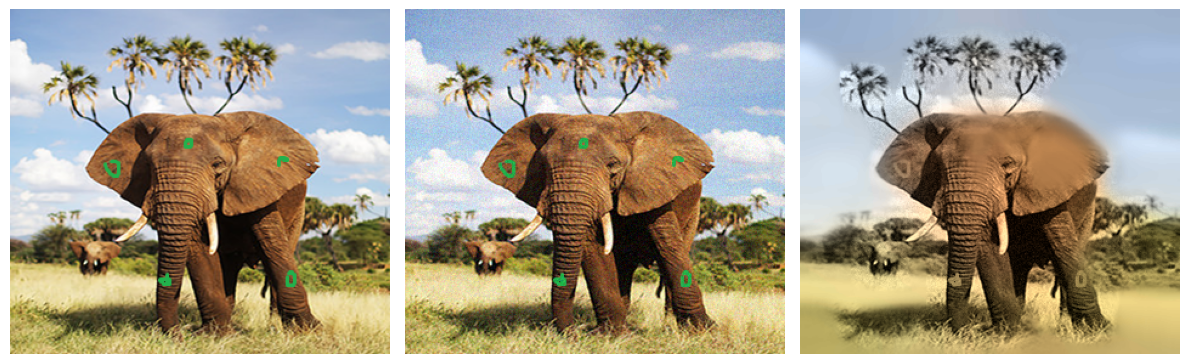

In [10]:
image_noisy_denoised = cv2.fastNlMeansDenoisingColored(image_noisy2, None, 10, 10, 7 * 5, 21 * 5)

show_image([cv2.cvtColor(image_noisy, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy2, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy_denoised, cv2.COLOR_BGR2RGB)], row_plot=1)

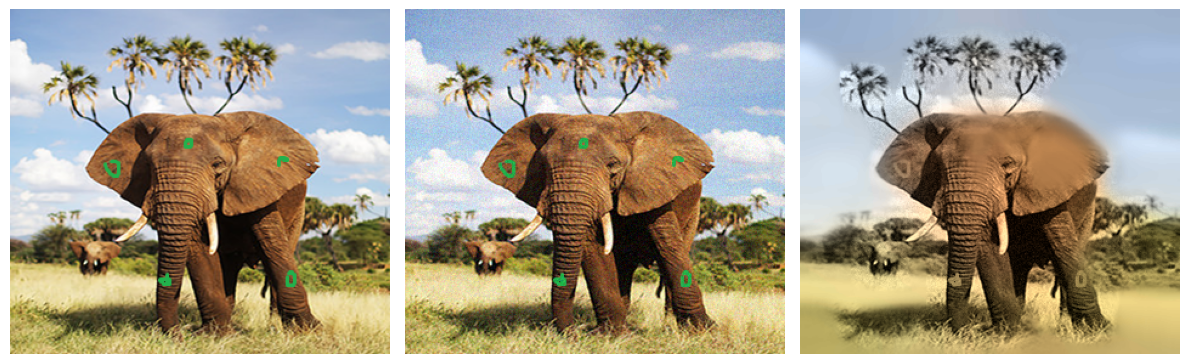

In [11]:
noice = np.random.randn(*image_noisy.shape)*10
image_noisy2 = np.uint8(np.clip(image_noisy + noise,0,255))
show_image([cv2.cvtColor(image_noisy, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy2, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy_denoised, cv2.COLOR_BGR2RGB)], row_plot = 1)

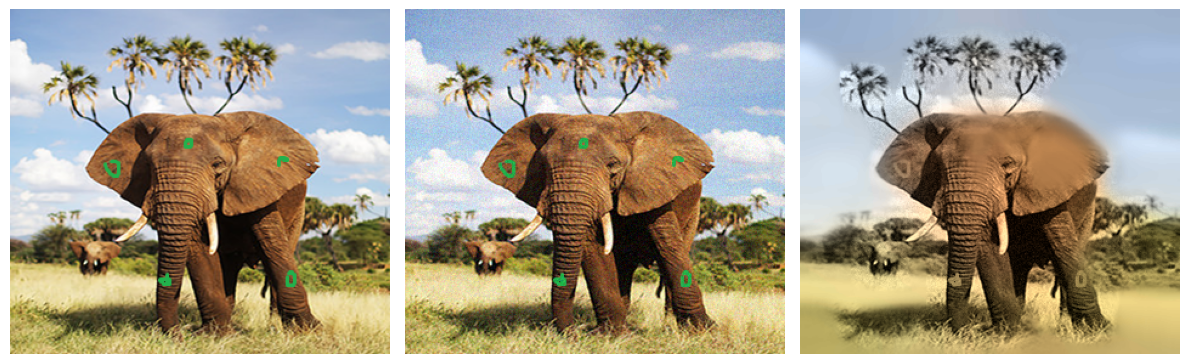

In [12]:
image_noisy_denoised = cv2.fastNlMeansDenoisingColored(image_noisy2, None,10,10,7*5,21*5)
show_image([cv2.cvtColor(image_noisy, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy2, cv2.COLOR_BGR2RGB), cv2.cvtColor(image_noisy_denoised, cv2.COLOR_BGR2RGB)], row_plot = 1)

In [21]:
capture_video = cv2.VideoCapture('./computer_vision/image_data/horse.mp4')

sz = (int(capture_video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(capture_video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fps = int(capture_video.get(cv2.CAP_PROP_FPS))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')

out = cv2.VideoWriter('./computer_vision/image_data/horse_noisy.mp4', fourcc, fps, sz, True)

while capture_video.isOpened():
    ret, frame = capture_video.read()

    if ret:
        noise = np.random.randn(*frame.shape) * 10
        noisy_frame = np.uint8(np.clip(frame + noise, 0, 255))

        out.write(noisy_frame)

        cv2.imshow('Noisy Video', noisy_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

capture_video.release()
out.release()
cv2.destroyAllWindows()
